In [1]:
# Step 1: Import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

In [2]:
# Step 2: Explore the dataset

data = []
labels = []
classes = 43
cur_path = "F:/ComputerVision/TrafficSignalReading/" 

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            # sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# check shape of data and labels
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [3]:
# Step 3: Build a CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

# compilation of model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [4]:
# Steps 4: Train and validate the model
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 62s 126ms/step - loss: 1.9073 - accuracy: 0.5464 - val_loss: 0.5016 - val_accuracy: 0.9115
Epoch 2/15
491/491 [==============================] - 61s 124ms/step - loss: 0.5479 - accuracy: 0.8427 - val_loss: 0.1864 - val_accuracy: 0.9535
Epoch 3/15
491/491 [==============================] - 61s 124ms/step - loss: 0.3573 - accuracy: 0.8967 - val_loss: 0.1412 - val_accuracy: 0.9593
Epoch 4/15
491/491 [==============================] - 60s 122ms/step - loss: 0.2974 - accuracy: 0.9128 - val_loss: 0.0973 - val_accuracy: 0.9731
Epoch 5/15
491/491 [==============================] - 60s 122ms/step - loss: 0.2378 - accuracy: 0.9304 - val_loss: 0.0706 - val_accuracy: 0.9829
Epoch 6/15
491/491 [==============================] - 60s 123ms/step - loss: 0.2158 - accuracy: 0.9362 - val_loss: 0.0613 - val_accuracy: 0.9825
Epoch 7/15
491/491 [==============================] - 60s 123ms/step - loss: 0.2071 - accuracy: 0.9389 - val_loss: 0.0663 - val_ac

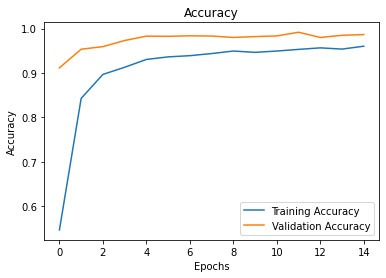

In [5]:
# Steps 5: plotting graphs for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

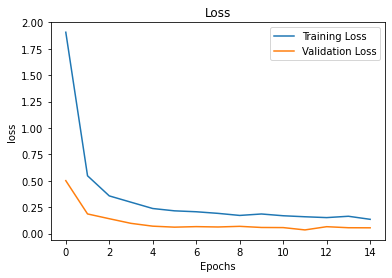

In [6]:
# Steps 6: plotting graphs for loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
# Step 7: Test our model with test dataset

# testing accuracy on test dataset

y_test = pd.read_csv(cur_path + "Test.csv")

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(cur_path + img)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)

pred = model.predict_classes(X_test)

# Accuracy with the test data
print(accuracy_score(labels, pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.9505938242280285


In [8]:
# Step 8: saving model
model.save("traffic_classifier.h5")

In [10]:
# Step 9: Traffic Signs Classifier GUI
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy as np

# load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')

# dictionary to label all traffic signs class.
classes = { 1: 'Speed limit (20km/h)',
            2: 'Speed limit (30km/h)',
            3: 'Speed limit (50km/h)',
            4: 'Speed limit (60km/h)',
            5: 'Speed limit (70km/h)',
            6: 'Speed limit (80km/h)',
            7: 'End of speed limit (80km/h)',
            8: 'Speed limit (100km/h)',
            9: 'Speed limit (120km/h)',
            10: 'No passing',
            11: 'No passing veh over 3.5 tons',
            12: 'Right-of-way at intersection',
            13: 'Priority road',
            14: 'Yield',
            15: 'Stop',
            16: 'No vehicles',
            17: 'Veh > 3.5 tons prohibited',
            18: 'No entry',
            19: 'General caution',
            20: 'Dangerous curve left',
            21: 'Dangerous curve right',
            22: 'Double curve',
            23: 'Bumpy road',
            24: 'Slippery road',
            25: 'Road narrows on the right',
            26: 'Road work',
            27: 'Traffic signals',
            28: 'Pedestrians',
            29: 'Children crossing',
            30: 'Bicycles crossing',
            31: 'Beware of ice/snow',
            32: 'Wild animals crossing',
            33: 'End speed + passing limits',
            34: 'Turn right ahead',
            35: 'Turn left ahead',
            36: 'Ahead only',
            37: 'Go straight or right',
            38: 'Go straight or left',
            39: 'Keep right',
            40: 'Keep left',
            41: 'Roundabout mandatory',
            42: 'End of no passing',
            43: 'End no passing veh > 3.5 tons' }

# initialise GUI
top = tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30, 30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign)

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.79, rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

No passing


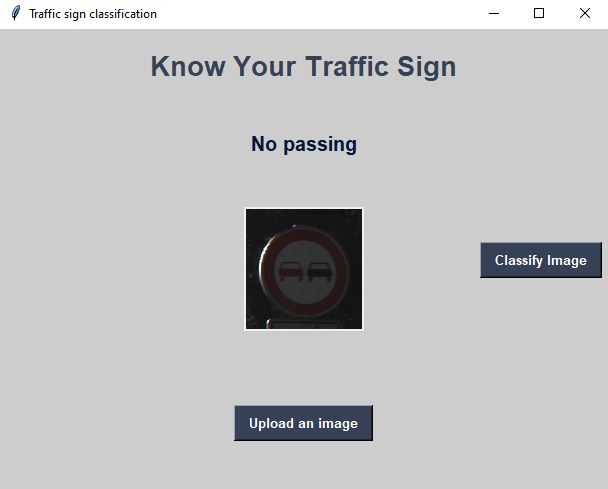

In [13]:
from IPython.display import Image
Image(filename='F:/ComputerVision/TrafficSignalReading/GUI.png',width=800, height=400)